In [17]:
# #Importing model.ipynb
# import import_ipynb 
# import model
# import song

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   34792 non-null  int64 
 1   sentiment  34792 non-null  object
 2   content    34792 non-null  object
dtypes: int64(1), object(2)
memory usage: 815.6+ KB
None


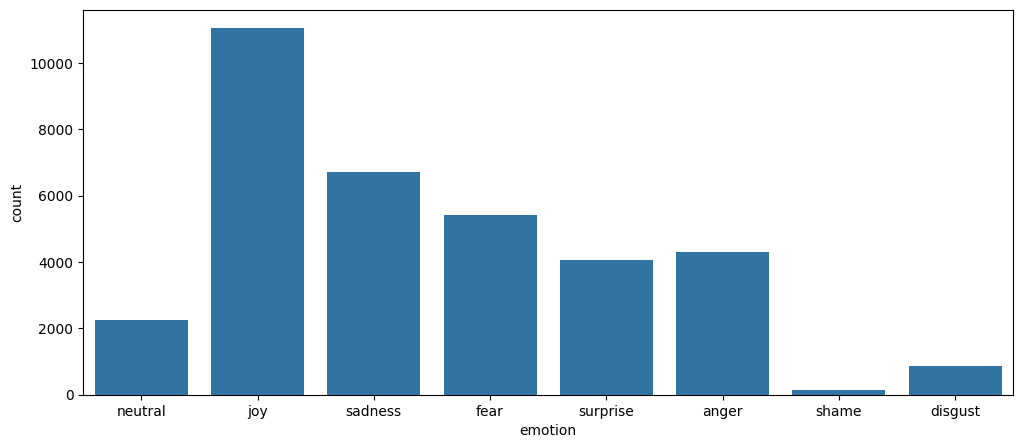

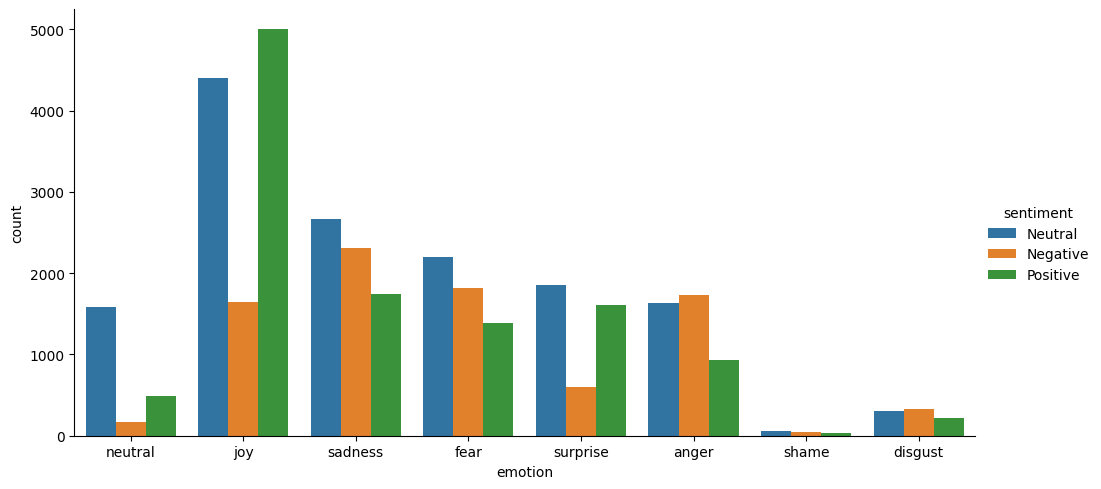

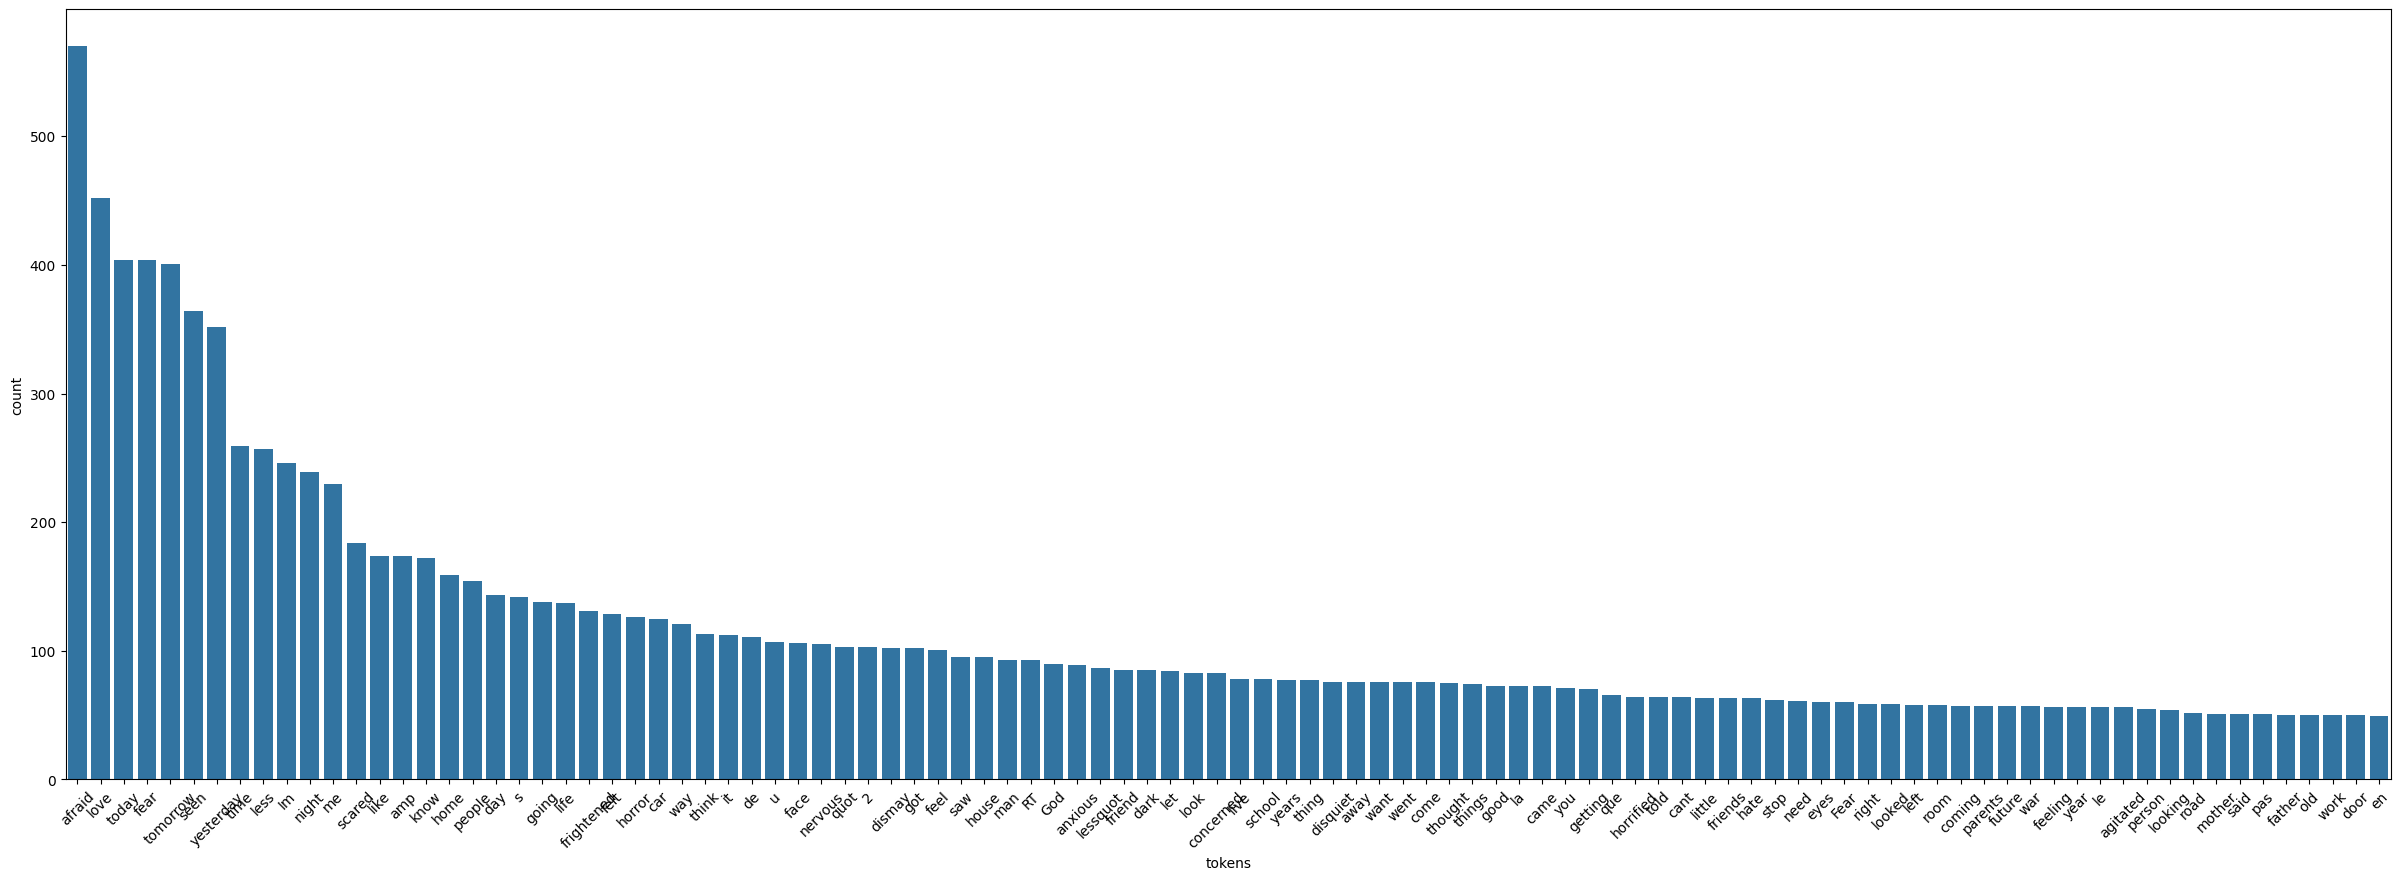

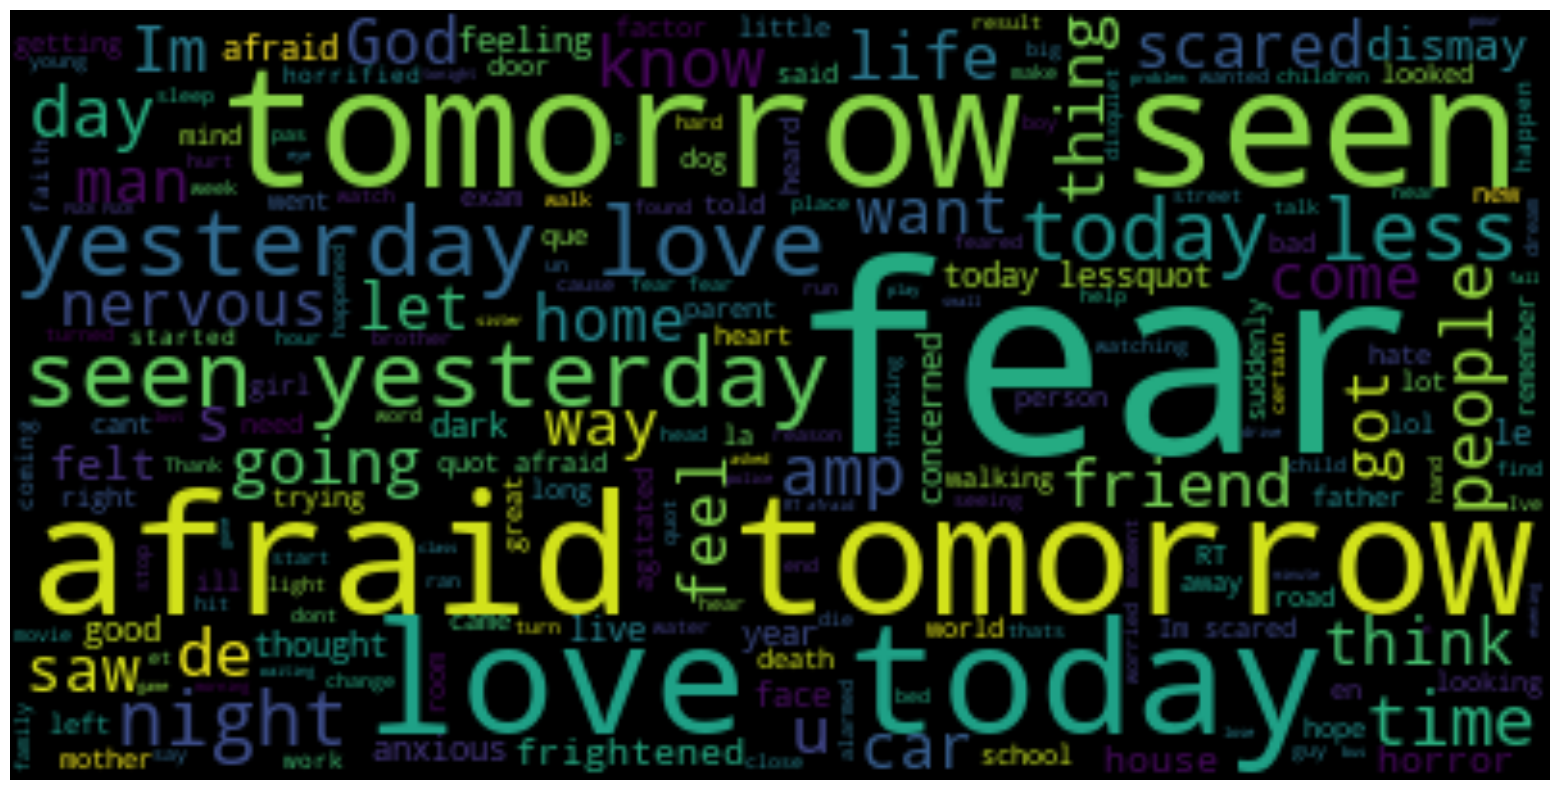

C:\Users\KIIT\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2610/2610 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4061 - loss: 1.6254
Epoch 2/10
2610/2610 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6384 - loss: 1.0278
Epoch 3/10
2610/2610 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7258 - loss: 0.8365
Epoch 4/10
2610/2610 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7581 - loss: 0.7209
Epoch 5/10
2610/2610 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7860 - loss: 0.6376
Epoch 6/10
2610/2610 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8104 - loss: 0.5639
Epoch 7/10
2610/2610 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8262 - loss: 0.5255
Epoch 8/10
2610/2610 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8456 - loss: 0.4842
Epoch 9/10
2610/2610 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8574 - loss: 0.4377
Epoch 10/10
2610/2610 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8735 - loss: 0.3987
816/816 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8939 - loss: 0.3433
Accuracy: 89.44
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [18]:
#If above code doesn't works
%run model.ipynb
%run song.ipynb

In [25]:
import random
joy_rand=random.randint(0,joy_row-1)
sadness_rand=random.randint(0,sadness_row-1)
neutral_rand=random.randint(0,neutral_row)
surprise_rand=random.randint(0,surprise_row)
anger_rand=random.randint(0,anger_row)
disgust_rand=random.randint(0,disgust_row)
shame_rand=random.randint(0,shame_row)
fear_rand=random.randint(0,fear_row)


In [20]:
#Predicting emotion
def emotion_pred(input_text):
    array = cv.transform([input_text]).toarray()
    pred = model1.predict(array)
    a=np.argmax(pred, axis=1)
    emotion=label_encoder.inverse_transform(a)[0]
    return emotion

In [27]:
#Predicting Song
['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']
def song_pred(emotion):
    if emotion == 'joy':
        return joy.iloc[random.randint(0,joy_row-1)]
    elif emotion == 'sadness':
        return sadness.iloc[random.randint(0,sadness_row-1)]
    elif emotion == 'neutral':
        return neutral.iloc[random.randint(0,neutral_row)]
    elif emotion == 'surprise':
        return surprise.iloc[random.randint(0,surprise_row)]
    elif emotion == 'anger':
        return anger.iloc[random.randint(0,anger_row)]
    elif emotion == 'disgust':
        return disgust.iloc[random.randint(0,disgust_row)]
    elif emotion == 'shame':
        return shame.iloc[random.randint(0,shame_row)]
    elif emotion == 'fear':
        return fear.iloc[random.randint(0,fear_row)]

In [28]:
# from flask import Flask,render_template,request,jsonify

# app= Flask(__name__)

# @app.route('/', methods=['GET', 'POST'])
# def homepage():
#     return render_template('index.html')

# @app.route('/review', methods=['POST'])
# def index():
#     if (request.method == 'POST'):
#         input_text = request.form['content']
#         emotion=emotion_pred(input_text)
#         song=song_pred(emotion)
#         return render_template('results.html',emotion=emotion,song=song.to_dict())
    
# if __name__ == '__main__':
#     app.run(host="0.0.0.0",port=8000)

In [29]:
from flask import Flask,request,jsonify
from flask_cors import CORS #importing CORS to tackle cors error

app= Flask(__name__)
CORS(app)


@app.route('/review', methods=['POST'])
def index():
    if (request.method == 'POST'):
        input_text = request.get_json()['thought']
        emotion=emotion_pred(input_text)
        song=song_pred(emotion)
        data = {"emotion":emotion,"song":song.to_dict()}
        return jsonify(data)
    
if __name__ == '__main__':
    app.run(host="0.0.0.0",port=8000)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8000
 * Running on http://10.2.251.238:8000
Press CTRL+C to quit


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


127.0.0.1 - - [10/Apr/2024 00:34:07] "POST /review HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


127.0.0.1 - - [10/Apr/2024 00:34:11] "POST /review HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


127.0.0.1 - - [10/Apr/2024 00:34:15] "POST /review HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


127.0.0.1 - - [10/Apr/2024 00:34:17] "POST /review HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


127.0.0.1 - - [10/Apr/2024 00:34:19] "POST /review HTTP/1.1" 200 -
